In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
fifa = pd.read_csv('fifa_data.csv')

#importing the data file
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


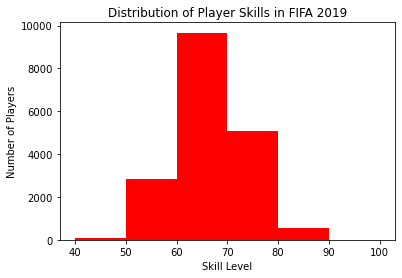

In [4]:
#using histogram to visualize the distribution of Player skills in FIFA 2019

bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='red')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2019')

plt.show()

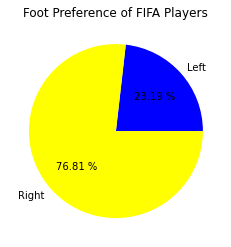

In [34]:
#Using piechart to visualize the Foot preference of FIFA 2019 players

left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left','Right']
colors = ('blue','yellow')

plt.pie([left,right], labels = labels, colors = colors, autopct = '%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

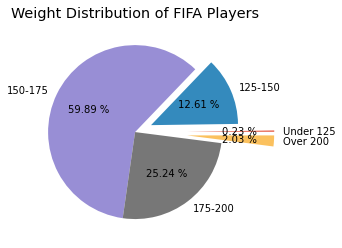

In [58]:
#using piechart to visualize the Weight Distribution of FIFA 2019 Players 

fifa.Weight = [int(x.strip('lbs')) if type(x) ==str else x for x in fifa.Weight]

plt.style.use('ggplot')
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[(fifa.Weight >= 200)].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.6,.2,0,0,.6) #to explode the piechart
plt.pie(weights,labels = labels, autopct = '%.2f %%', explode = explode) 

plt.title ('Weight Distribution of FIFA Players')

plt.show()

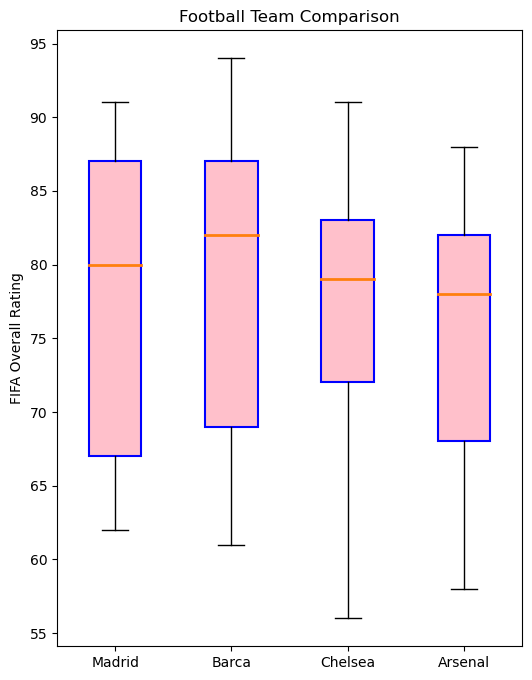

In [93]:
#using boxplot to visualize the comparison of different teams in FIFA 2019

plt.style.use('default') 

plt.figure(figsize=(6,8))

madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
barca = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
chelsea = fifa.loc[fifa.Club == 'Chelsea']['Overall']
arsenal = fifa.loc[fifa.Club == 'Arsenal']['Overall']

labels = ['Madrid', 'Barca', 'Chelsea', 'Arsenal']

boxes = plt.boxplot([madrid, barca, chelsea, arsenal], labels = labels, patch_artist = True, medianprops = {'linewidth':2})

for box in boxes['boxes']:
    #set edge color
    box.set(color = 'blue', linewidth = 1.5)
    
    #set fill color
    box.set(facecolor = 'pink')

plt.title('Football Team Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()